In [2]:
import math
from dataclasses import dataclass

@dataclass
class Point:
    x: float
    y: float
    
    def angle_with(self, other_point):
        """
        Calculate the angle between two points.

        Parameters:
            other_point (Point): The other point to calculate the angle with.

        Returns:
            float: The angle in radians.
        """
        dx = other_point.x - self.x
        dy = other_point.y - self.y
        return math.atan2(dy, dx)

# Example usage:
point1 = Point(0, 0)
point2 = Point(0, -1)
angle = point1.angle_with(point2)
print("Angle between point1 and point2:", angle)

Angle between point1 and point2: -1.5707963267948966


In [3]:
from test_data_generator import generate_fake_metro, plot_metro_layout


flow_paths, stations, df = generate_fake_metro(
    station_count=10,
    flow_path_count=10,
    max_flow_path_length=5,
    min_flow_path_frequency=1,
    max_flow_path_frequency=10
)

In [4]:
flow_paths

[(1, ['Root', 'J', 'C']),
 (10, ['Root', 'J', 'C']),
 (9, ['Root', 'J', 'C']),
 (9, ['Root', 'J', 'C']),
 (1, ['Root', 'J', 'C']),
 (3, ['Root', 'J']),
 (9, ['Root', 'J', 'C']),
 (2, ['Root', 'J']),
 (5, ['Root', 'J', 'C']),
 (6, ['Root', 'J'])]

<module 'matplotlib.pyplot' from 'c:\\Users\\lucsc\\anaconda3\\envs\\main\\Lib\\site-packages\\matplotlib\\pyplot.py'>

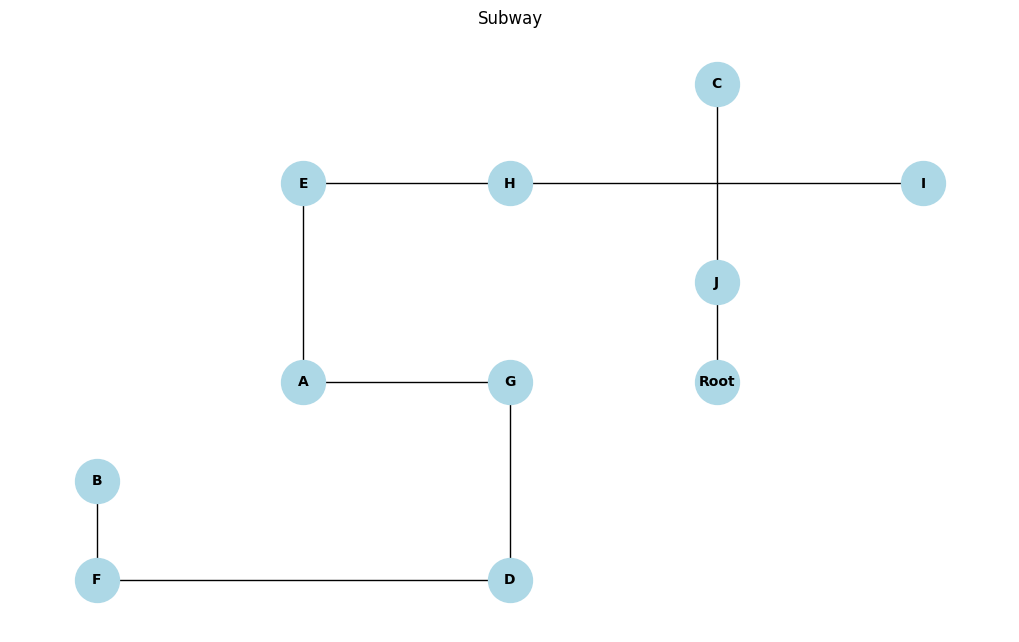

In [5]:
from test_data_generator import plot_metro_layout

plot_metro_layout(df)

In [6]:
from algo import DummyAlgorithm, DirectionalAlg
from utils import LayoutAlgorithm, FlowPathsT, Point, LayoutOutput

algorithms: [LayoutAlgorithm] = [
    DummyAlgorithm(),
    DirectionalAlg()
]

algorithms[1].find_optimal_layout(flow_paths=flow_paths, stations=stations)

{('Root', 'S0'): Point(x=41, y=20),
 ('Root', 'S1'): Point(x=41, y=21),
 ('A', 'S0'): Point(x=21, y=20),
 ('A', 'S1'): Point(x=21, y=21),
 ('B', 'S0'): Point(x=11, y=10),
 ('B', 'S1'): Point(x=11, y=11),
 ('C', 'S0'): Point(x=41, y=50),
 ('C', 'S1'): Point(x=41, y=51),
 ('D', 'S0'): Point(x=31, y=0),
 ('D', 'S1'): Point(x=31, y=1),
 ('E', 'S0'): Point(x=21, y=40),
 ('E', 'S1'): Point(x=21, y=41),
 ('F', 'S0'): Point(x=11, y=0),
 ('F', 'S1'): Point(x=11, y=1),
 ('G', 'S0'): Point(x=31, y=20),
 ('G', 'S1'): Point(x=31, y=21),
 ('H', 'S0'): Point(x=31, y=40),
 ('H', 'S1'): Point(x=31, y=41),
 ('I', 'S0'): Point(x=51, y=40),
 ('I', 'S1'): Point(x=51, y=41),
 ('J', 'S0'): Point(x=41, y=30),
 ('J', 'S1'): Point(x=41, y=31)}

In [7]:
import math

def generate_slot_offsets(N):
    SLOT_OFFSETS = {}
    for i in range(1, N+1):
        theta = math.pi * (i - 0.5) / N
        x = round(math.cos(theta), 3)
        y = round(math.sin(theta), 3)
        SLOT_OFFSETS[f'S{i}'] = (x, y)
    return SLOT_OFFSETS

# Example usage:
N = 5  # Number of slots
new_slot_offsets = generate_slot_offsets(N)
print(new_slot_offsets)


{'S1': (0.951, 0.309), 'S2': (0.588, 0.809), 'S3': (0.0, 1.0), 'S4': (-0.588, 0.809), 'S5': (-0.951, 0.309)}


In [8]:
import math

def generate_slots(list_of_angles):
    N = len(list_of_angles)
    SLOT_OFFSETS = {}
    for i in range(N):
        x = i + 0.5
        y = i + 0.5
        SLOT_OFFSETS[f'S{i}'] = (x, y)
    return SLOT_OFFSETS

# Example usage:
list_of_angles = [45, 135, 225, 315]
slots = generate_slots(list_of_angles)
print(slots)

{'S0': (0.5, 0.5), 'S1': (1.5, 1.5), 'S2': (2.5, 2.5), 'S3': (3.5, 3.5)}


In [9]:

def generate_slots(n):
    SLOT_OFFSETS = {}
    x = 0.5
    y = 0.5
    for i in range(n):
        if i % 2 == 0:
            SLOT_OFFSETS[f'S{i}'] = (x, y)
            x += 1
        else:
            SLOT_OFFSETS[f'S{i}'] = (-x, y)
            y += 1
    return SLOT_OFFSETS

# Example usage:
n = 6
slots = generate_slots(n)
print(slots)

{'S0': (0.5, 0.5), 'S1': (-1.5, 0.5), 'S2': (1.5, 1.5), 'S3': (-2.5, 1.5), 'S4': (2.5, 2.5), 'S5': (-3.5, 2.5)}


In [10]:
x,y = 0,0

In [11]:
x

0

In [12]:
list_of_angles = ({'RootB': 0.0},
 {'RootBA': -0.19739555984988075,
  'RootFIJDG': -0.982793723247329,
  'RootF': -1.5707963267948966,
  'RootFIJD': -1.2490457723982544})

def generate_slots(list_of_angles):
    N = len(list_of_angles[0])
    SLOT_OFFSETS = {}
    x,y = 0,0
    if N <= 1:
        SLOT_OFFSETS[f'S{0}'] = (x, y)
        x-=1
    else:
        for i in range(1,N+1):
            if i % 2 == 0:
                SLOT_OFFSETS[f'S{i}'] = (x, y)
                x += 1
            else:
                SLOT_OFFSETS[f'S{i}'] = (-x, y)
                y += 1
    N = len(list_of_angles[1])
    print(x)
    if N <= 1:
        SLOT_OFFSETS[f'S{0}'] = (x, y)
        x -= 1
    else:
        for i in range(1,N+1):
            print(i)
            if i % 2 == 0:
                SLOT_OFFSETS[f'S{i}'] = (x, y)
                x -= 1
                # print(i)
            else:
                SLOT_OFFSETS[f'S{i}'] = (-x, y)
                y -= 1

    return SLOT_OFFSETS

In [13]:
generate_slots(list_of_angles)

-1
1
2
3
4


{'S0': (0, 0), 'S1': (1, 0), 'S2': (-1, -1), 'S3': (2, -1), 'S4': (-2, -2)}

In [14]:
for i in range(1,1):
    if i == 0:
        x,y = 0,0
    if i % 2 == 0:
        x += 1
    else:
        y += 1
print(x,y)

0 0


In [15]:
def generate_slots(list_of_angles):
    SLOT_OFFSETS = {}
    x, y = 0, 0
    counter = 0

    for name, angle in list_of_angles[0].items():
        print(angle)
        if angle>=0:
            if counter % 2 ==0:
                x +=1
                SLOT_OFFSETS[f'S{counter}'] = (x, y)
                counter+=1
            else:
                y +=1
                print(y)
                SLOT_OFFSETS[f'S{counter}'] = (x, y)
                counter+=1
    x,y = 0,0

    for name, angle in list_of_angles[1].items():
        if counter % 2 ==0:
            x-=1

            SLOT_OFFSETS[f'S{counter}'] = (x, y)
            counter+=1
        else:
            y -=1
            SLOT_OFFSETS[f'S{counter}'] = (x, y)
            counter+=1

    return SLOT_OFFSETS

In [16]:
generate_slots(list_of_angles)

0.0


{'S0': (1, 0), 'S1': (0, -1), 'S2': (-1, -1), 'S3': (-1, -2), 'S4': (-2, -2)}

In [17]:
def generate_slots(list_of_angles):
    SLOT_OFFSETS = {}
    x, y = 0, 0
    counter = 0

    for name, angle in list_of_angles[0].items():
        if angle >= 0:
            x += 1 if counter % 2 == 0 else 0
            y += 1 if counter % 2 != 0 else 0
            SLOT_OFFSETS[f'S{counter}'] = (x, y)
            counter += 1

    x, y = 0, 0

    for name, angle in list_of_angles[1].items():
        x -= 1 if counter % 2 == 0 else 0
        y -= 1 if counter % 2 != 0 else 0
        SLOT_OFFSETS[f'S{counter}'] = (x, y)
        counter += 1

    return SLOT_OFFSETS


In [18]:
generate_slots(list_of_angles)

{'S0': (1, 0), 'S1': (0, -1), 'S2': (-1, -1), 'S3': (-1, -2), 'S4': (-2, -2)}

In [49]:
def generate_slots(list_of_angles):
    SLOT_OFFSETS = {}
    x, y = 1, 1
    counter = 1
    for i in range(len(list_of_angles[0])):
        if i % 2 == 0:
            x = -1 *counter
            y = 1* counter
            counter += 1
        else:
            x = counter
            y = counter
        SLOT_OFFSETS[f'S{i}'] = (x, y)

    counter = 1
    for i in range(len(list_of_angles[1])):
        if i % 2 == 0:
            x = -1 *counter
            y = (-1)* counter
            counter += 1
        else:
            x = 1*counter
            y = -1* counter
        SLOT_OFFSETS[f'S{i}'] = (x, y)

    return SLOT_OFFSETS


In [50]:
generate_slots(list_of_angles)

{'S0': (-1, -1), 'S1': (2, -2), 'S2': (-2, -2), 'S3': (3, -3)}